#### MinMaxScaler
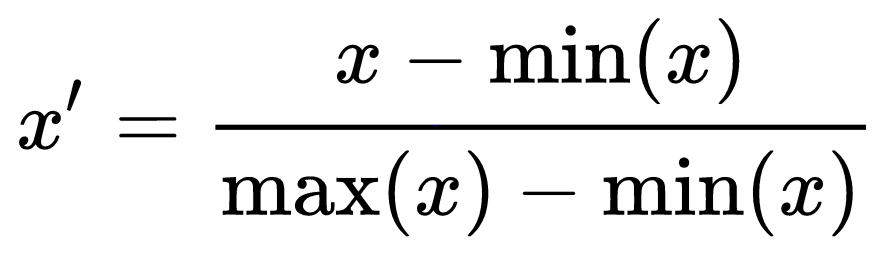
- **Purpose**:
  1.  Scales features to a range between 0 and 1 (inclusive).
  2.  Useful when features have different scales (e.g., income in dollars vs. age in years).
  3.  Used when algorithms are sensitive to feature scales (e.g., distance-based algorithms like K-Nearest Neighbors).

#### StandardScaler (Z-Score Normalization)
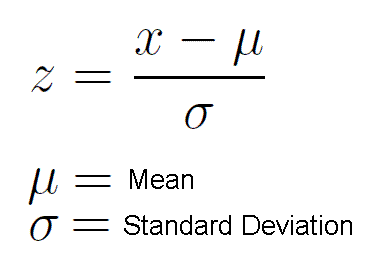
- **Purpose**
  1. Centers the data around zero, making it less sensitive to outliers.
  2. Ensures features are on a similar scale, especially when some have much larger ranges than others.
  3. Scales features to have a mean of 0 and a standard deviation of 1.

#### SimpleImputer
- **Purpose**
  1. Fills missing values (NaNs) in your data with a chosen strategy.
  2. Imputation strategy is chosen based on the data type and distribution (eg. mean(default),median,most_frequent,constant)

#### OneHotEncoder
- **Purpose**
  1. Used when your dataset contains categorical features with multiple categories that need to be fed into a machine learning model that expects numerical features.

In [1]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression

In [2]:
steps = [('standard_scaler',StandardScaler()),
        ('classifier',LogisticRegression())]

In [3]:
steps

[('standard_scaler', StandardScaler()), ('classifier', LogisticRegression())]

In [4]:
pipe = Pipeline(steps)

In [5]:
# Visualise the pipeline
from sklearn import set_config 

In [6]:
set_config(display='diagram')

In [7]:
pipe

Pipeline(steps=[('standard_scaler', StandardScaler()),
                ('classifier', LogisticRegression())])

In [8]:
# Creating a dataset
from sklearn.datasets import make_classification
X,y=make_classification(n_samples=1000)

In [9]:
X.shape

(1000, 20)

In [10]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.33, random_state=42)

In [11]:
pipe.fit(X_train,y_train);

In [12]:
pipe.predict(X_test)

array([0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1,
       1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1,
       1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 0,
       0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1,
       0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0,
       0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1,
       0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 1,
       0, 1, 1, 0, 1, 0, 0, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0,
       0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0,
       1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1,
       1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1,
       0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1,
       0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 1, 0,
       1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1,

#### Example 2
Displaying a pipeline with StandardScalar, Dimensionality Reduction and then estimator 

In [52]:
from sklearn.decomposition import PCA
from sklearn.svm import SVC

In [53]:
steps=[('Scaling',StandardScaler()),
      ('PCA',PCA(n_components=3)),
      ('SVC',SVC())]

In [54]:
pipe2 = Pipeline(steps)

In [56]:
pipe2['Scaling'].fit_transform(X_train) # I want to independently do things -> that's why we give names

array([[ 0.76105865,  0.02553391, -0.03449365, ...,  0.55179199,
         0.53984631,  0.54987053],
       [ 0.10953611, -0.1537729 ,  0.27821314, ..., -0.98590695,
         0.56996481, -0.4499101 ],
       [ 1.25199927, -1.31312927,  1.19059502, ...,  0.79731078,
        -0.61364224,  1.30225349],
       ...,
       [-0.33951323, -0.07599486,  0.83506166, ...,  0.25586216,
         0.33497079,  0.34024051],
       [ 0.43728001,  0.90278498, -0.24819707, ..., -1.80696694,
         1.66842568, -1.40217792],
       [ 2.41700942, -1.20804565, -0.84870541, ..., -1.14019441,
         0.2513121 ,  1.17715399]])

In [58]:
pipe2.fit(X_train,y_train) # Applying all steps at once

Pipeline(steps=[('Scaling', StandardScaler()), ('PCA', PCA(n_components=3)),
                ('SVC', SVC())])

#### PCA (Principal Component Analysis)
- Two different ways to remove **curse of dimensionality**
  1. Feature Selection
  2. Dimensionality Reduction -> feature extraction
- **PCA** is a dimensionality reduction technique 

Why Dimensionality Reduction?
- Prevent curse of dimensionality
- Improve the performance of the model
- Visualize the data (more than 3 dimensions)

##### 1. Feature Selection 
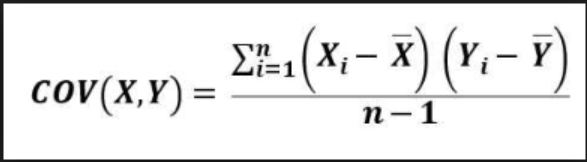

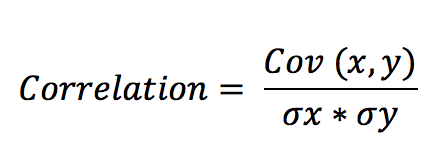

- When covariance (cov) ≈ 0 : No relationship between x and y. It can be +ve or -ve
- correlation (cor) : Value more towards +1 => more +vely x and y are correlated, more value towards -1 => more -vely x and y are correlated, cor = 0 => no relation 

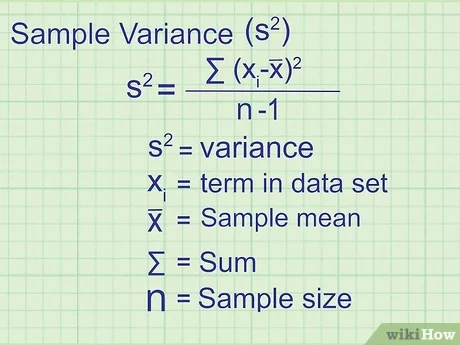

#### Principal Component Analysis (PCA) - Dimensionality Reduction

In [13]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd

In [14]:
# Load the dataset
from sklearn.datasets import load_breast_cancer

In [22]:
cancer = load_breast_cancer()

In [23]:
cancer.keys()

dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename', 'data_module'])

In [24]:
print(cancer.DESCR)

.. _breast_cancer_dataset:

Breast cancer wisconsin (diagnostic) dataset
--------------------------------------------

**Data Set Characteristics:**

    :Number of Instances: 569

    :Number of Attributes: 30 numeric, predictive attributes and the class

    :Attribute Information:
        - radius (mean of distances from center to points on the perimeter)
        - texture (standard deviation of gray-scale values)
        - perimeter
        - area
        - smoothness (local variation in radius lengths)
        - compactness (perimeter^2 / area - 1.0)
        - concavity (severity of concave portions of the contour)
        - concave points (number of concave portions of the contour)
        - symmetry
        - fractal dimension ("coastline approximation" - 1)

        The mean, standard error, and "worst" or largest (mean of the three
        worst/largest values) of these features were computed for each image,
        resulting in 30 features.  For instance, field 0 is Mean Radi

In [25]:
df = pd.DataFrame(cancer['data'],columns=cancer['feature_names'])

In [26]:
df.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [27]:
# Standardization
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

In [28]:
scaler.fit(df)

StandardScaler()

In [29]:
scaled_data = scaler.transform(df)

In [30]:
scaled_data

array([[ 1.09706398, -2.07333501,  1.26993369, ...,  2.29607613,
         2.75062224,  1.93701461],
       [ 1.82982061, -0.35363241,  1.68595471, ...,  1.0870843 ,
        -0.24388967,  0.28118999],
       [ 1.57988811,  0.45618695,  1.56650313, ...,  1.95500035,
         1.152255  ,  0.20139121],
       ...,
       [ 0.70228425,  2.0455738 ,  0.67267578, ...,  0.41406869,
        -1.10454895, -0.31840916],
       [ 1.83834103,  2.33645719,  1.98252415, ...,  2.28998549,
         1.91908301,  2.21963528],
       [-1.80840125,  1.22179204, -1.81438851, ..., -1.74506282,
        -0.04813821, -0.75120669]])

In [31]:
# Apply PCA Algorithm
from sklearn.decomposition import PCA

In [33]:
pca = PCA(n_components=2) # Into 2 features

In [38]:
data_pca = pca.fit_transform(scaled_data) # train ; for test use only transform

In [36]:
data_pca # Entire scaled_data got converted into two features components 

array([[ 9.19283683,  1.94858307],
       [ 2.3878018 , -3.76817174],
       [ 5.73389628, -1.0751738 ],
       ...,
       [ 1.25617928, -1.90229671],
       [10.37479406,  1.67201011],
       [-5.4752433 , -0.67063679]])

In [44]:
pca.explained_variance_

array([1.33049908e+01, 5.70137460e+00, 2.82291016e+00, 1.98412752e+00,
       1.65163324e+00, 1.20948224e+00, 6.76408882e-01, 4.77456255e-01,
       4.17628782e-01, 3.51310875e-01, 2.94433153e-01, 2.61621161e-01,
       2.41782421e-01, 1.57286149e-01, 9.43006956e-02, 8.00034045e-02,
       5.95036135e-02, 5.27114222e-02, 4.95647002e-02, 3.12142606e-02,
       3.00256631e-02, 2.74877113e-02, 2.43836914e-02, 1.80867940e-02,
       1.55085271e-02, 8.19203712e-03, 6.91261258e-03, 1.59213600e-03,
       7.50121413e-04, 1.33279057e-04])

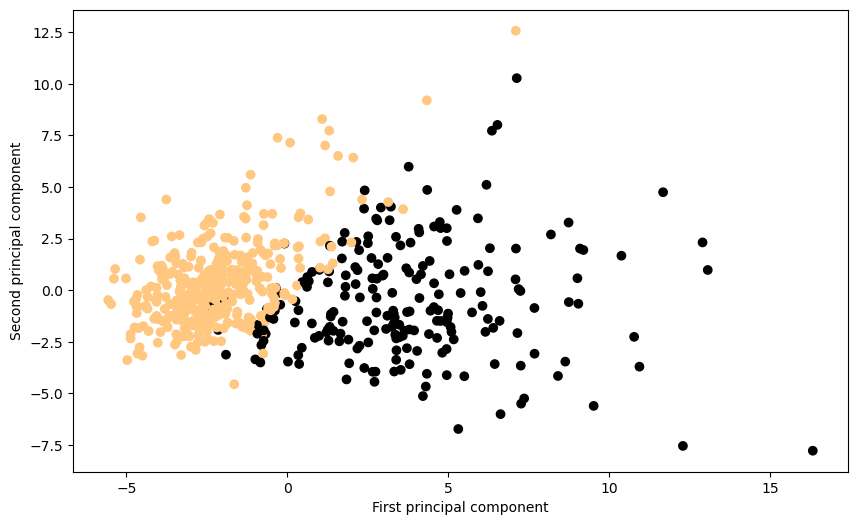

In [51]:
plt.figure(figsize=(10,6))
plt.scatter(data_pca[:,0],data_pca[:,1],c=cancer['target'],cmap='copper')
plt.xlabel('First principal component')
plt.ylabel('Second principal component') 
plt.show()

#### Example 3
Complex example of column transformer

In [59]:
from sklearn.impute import SimpleImputer

In [62]:
# For numerical processing pipeline
numeric_processor = Pipeline(
    steps=[('Imputation_mean',SimpleImputer(missing_values=np.nan,strategy='mean')),
          ('Scaler',StandardScaler())]
)

In [63]:
numeric_processor

Pipeline(steps=[('Imputation_mean', SimpleImputer()),
                ('Scaler', StandardScaler())])

In [66]:
# Categorical processing pipeline
from sklearn.preprocessing import OneHotEncoder

categorical_processor = Pipeline(
    steps=[('Imputation_Constant',SimpleImputer(fill_value='missing',strategy='constant')),
          ('OneHotEncoder_name',OneHotEncoder(handle_unknown='ignore'))]
)

In [67]:
categorical_processor

Pipeline(steps=[('Imputation_Constant',
                 SimpleImputer(fill_value='missing', strategy='constant')),
                ('OneHotEncoder_name', OneHotEncoder(handle_unknown='ignore'))])

In [68]:
# Combine processing techniques
from sklearn.compose import ColumnTransformer

In [72]:
pre_processor = ColumnTransformer(
    [('categorical', categorical_processor, ['gender', 'City']),
     ('numerical', numeric_processor, ['age', 'height'])]
)

In [73]:
pre_processor

ColumnTransformer(transformers=[('categorical',
                                 Pipeline(steps=[('Imputation_Constant',
                                                  SimpleImputer(fill_value='missing',
                                                                strategy='constant')),
                                                 ('OneHotEncoder_name',
                                                  OneHotEncoder(handle_unknown='ignore'))]),
                                 ['gender', 'City']),
                                ('numerical',
                                 Pipeline(steps=[('Imputation_mean',
                                                  SimpleImputer()),
                                                 ('Scaler', StandardScaler())]),
                                 ['age', 'height'])])

In [74]:
from sklearn.pipeline import make_pipeline

In [75]:
final_pipe = make_pipeline(pre_processor,LogisticRegression())

In [76]:
final_pipe

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(transformers=[('categorical',
                                                  Pipeline(steps=[('Imputation_Constant',
                                                                   SimpleImputer(fill_value='missing',
                                                                                 strategy='constant')),
                                                                  ('OneHotEncoder_name',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  ['gender', 'City']),
                                                 ('numerical',
                                                  Pipeline(steps=[('Imputation_mean',
                                                                   SimpleImputer()),
                                                                  ('Scaler',
                                                                   StandardScaler())]),
                                                  ['age', 'height'])])),
                ('logisticregression', LogisticRegression())])